# TP1

In [184]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

## Ejercicio 1

In [185]:
MOD = 2**32.0
MULT = 1013904223
INC = 1664525

In [186]:
def gcl( seed, size=10, normalized=False ):
    results = []
    xn = seed
    for i in range(size):
        xn = (((MULT*xn) + INC) % MOD)
        results.append(xn)

    return results if not normalized else [ res/MOD for res in results ]

In [187]:
# (97980 + 98178 + 98070 + 100856) / 4 = 98771
numbers = gcl( 98771 )
for i,n in enumerate(numbers, 1):
    print("i={}: {}".format(i, n))

i=1: 2878200922.0
i=2: 412326400.0
i=3: 1712163840.0
i=4: 3808713216.0
i=5: 203738112.0
i=6: 392501760.0
i=7: 3528199168.0
i=8: 1639307776.0
i=9: 2357414912.0
i=10: 1844877824.0


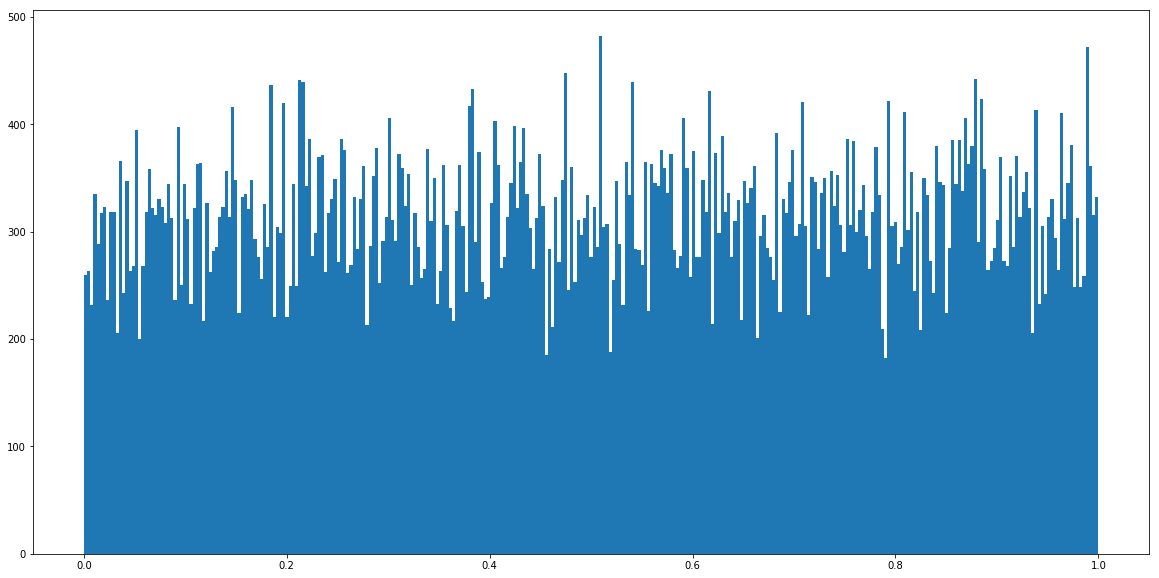

In [188]:
numbers = gcl( 98771, size=100000, normalized=True)
fig, ax = plt.subplots(figsize=(20,10))
ax.hist(numbers, bins=317)
plt.show()

## Ejercicio 2

In [189]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import expon

In [190]:
f = []

In [191]:
for t in range(10):
    f.append(1.0/25.0)

In [192]:
for t in range(10,100):
    f.append(3.0/5.0*expon.pdf(t,loc=10,scale=15))

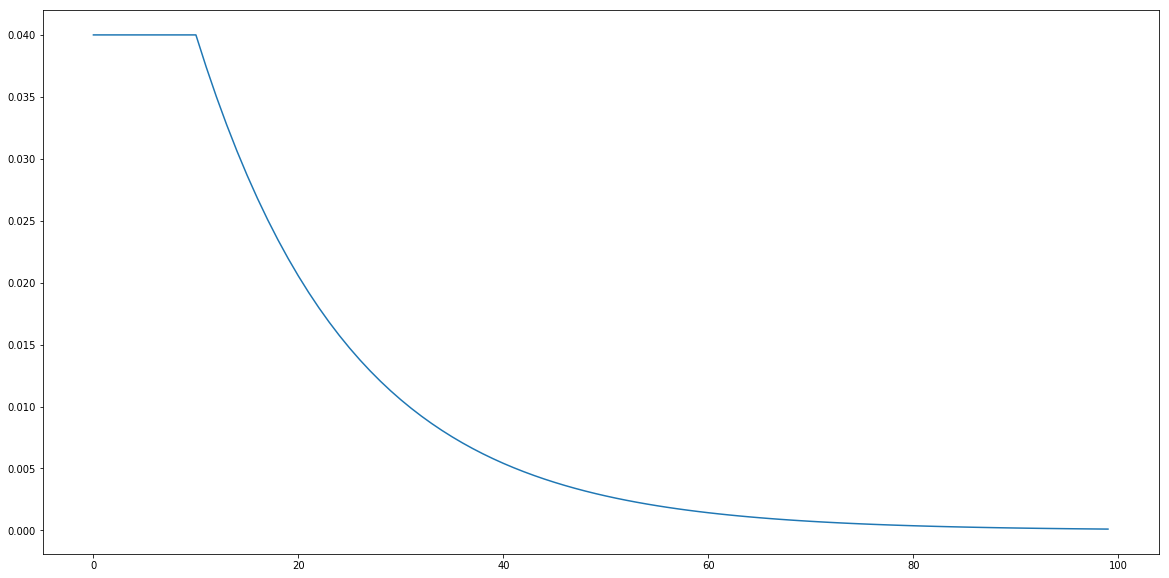

In [193]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(f)
plt.show()

In [194]:
F = []

In [195]:
for t in range(10):
    F.append(1.0/25.0*t)

In [196]:
last = F[len(F)-1]

In [197]:
for t in range(11,100):
    F.append(3.0/5.0*expon.cdf(t,loc=10,scale=15) + last)

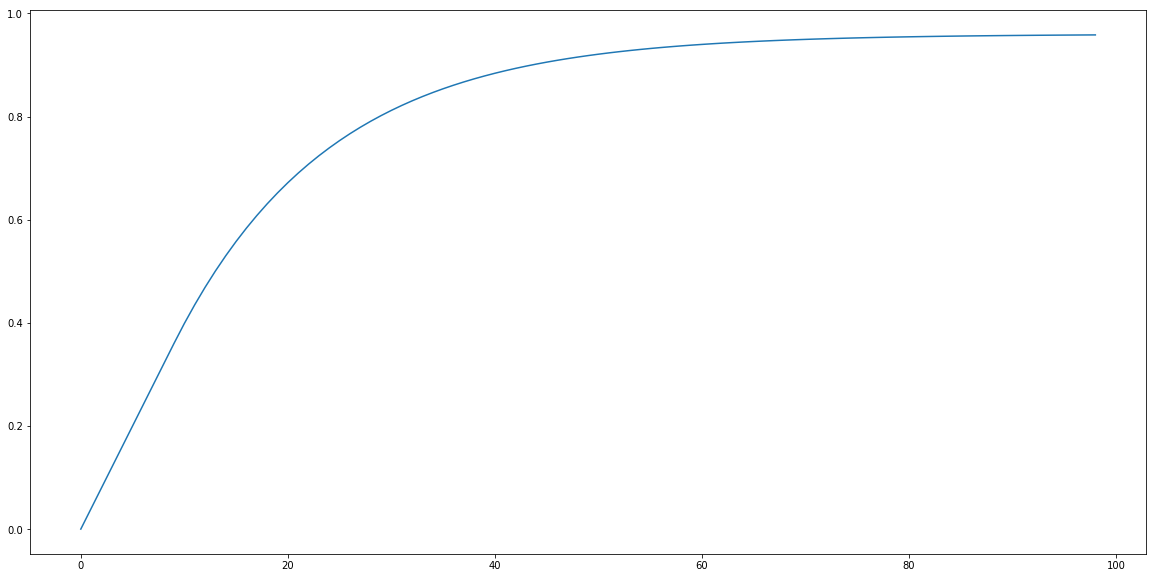

In [198]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(F)
plt.show()

## Ejercicio 3

In [199]:
def p(x):
    return st.norm.pdf( x, loc=15, scale=3 )

def q(x):
    return st.expon.pdf( x, scale=50 )

In [200]:
x = np.arange(0,40)
k = max( p(x) / q(x) )

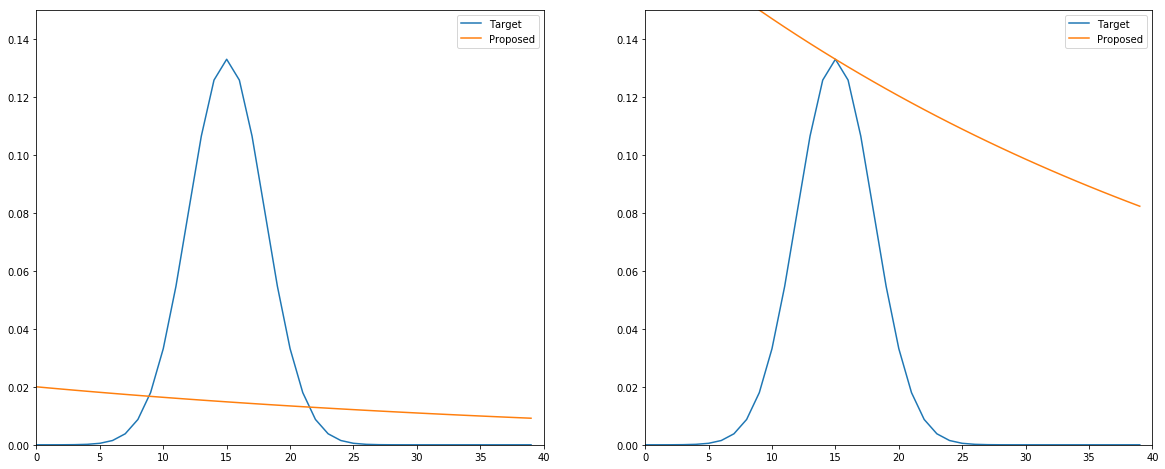

In [201]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.plot(x, p(x), label='Target')
ax1.plot(x, q(x), label='Proposed')
ax1.set_ylim((0,0.150)); ax1.set_xlim((0,40))
ax2.plot(x, p(x), label='Target')
ax2.plot(x, k*q(x), label='Proposed')
ax2.set_ylim((0,0.150)); ax2.set_xlim((0,40))
ax1.legend(); ax2.legend()

In [236]:
def accept_reject_method(iter = 100000):
    samples = []

    for i in range(iter):
        z = np.random.exponential(50)
        u = np.random.uniform(0, k*q(z))

        if u < p(z):
            samples.append(z)

    return np.array(samples)


In [203]:
s = accept_reject_method()

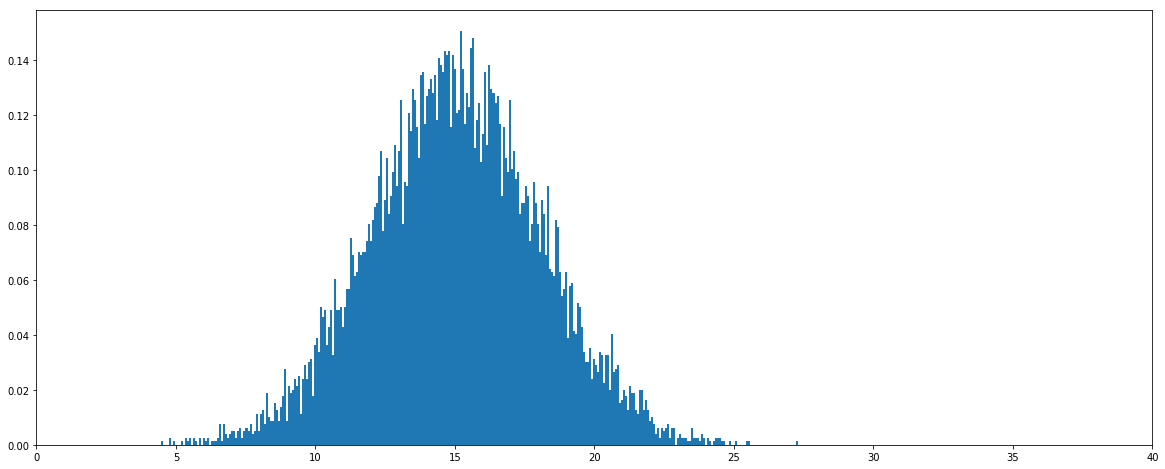

In [204]:
fig, ax = plt.subplots(figsize=(20,8))
ax.hist( s, bins=317, density=True )
ax.set_xlim((0,40))
plt.show()

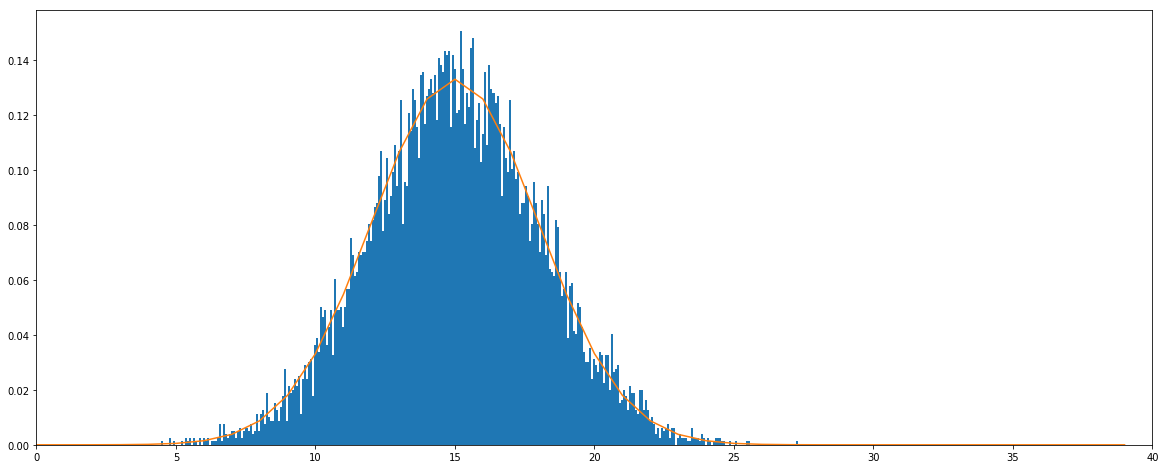

In [205]:
fig, ax = plt.subplots(figsize=(20,8))
ax.hist( s, bins=317, density=True )
ax.plot( x, p(x))
ax.set_xlim((0,40))
plt.show()

In [206]:
print("La media de la distribucion obtenida es: {} y la varianza: {}".format(s.mean(), s.var()))

La media de la distribucion obtenida es: 15.0336641298 y la varianza: 9.17112591644


In [207]:
print("Factor de rendimiento del metodo: {}".format( len(s)/100000))

Factor de rendimiento del metodo: 0


## Ejercicio 4

In [208]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage.interpolation import rotate
import math

In [209]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [210]:
points = 1000

In [211]:
xs = np.random.uniform(low=0, high=1, size=(points))*5 + 7.5
ys = np.random.uniform(low=0, high=1, size=(points))*5 + 7.5

In [212]:
l = []
for i in range(points):
    l.append(rotate((10,10),(xs[i],ys[i]),math.radians(45)))

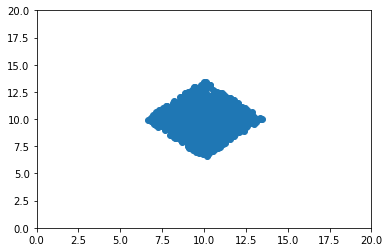

In [213]:
fig,ax = plt.subplots()
ax.scatter([x[0] for x in l],[x[1] for x in l])
ax.set_xlim((0,20))
ax.set_ylim((0,20))
plt.show()

## Ejercicio 5

In [214]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [215]:
def box_muller(u1,u2):
    z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    return z1,z2

In [216]:
us = np.random.uniform(0,1,(100000,2))

In [217]:
z1 = []
z2 = []
for u1, u2 in us:
    zs = box_muller(u1,u2)
    z1.append(zs[0])    
    z2.append(zs[1])

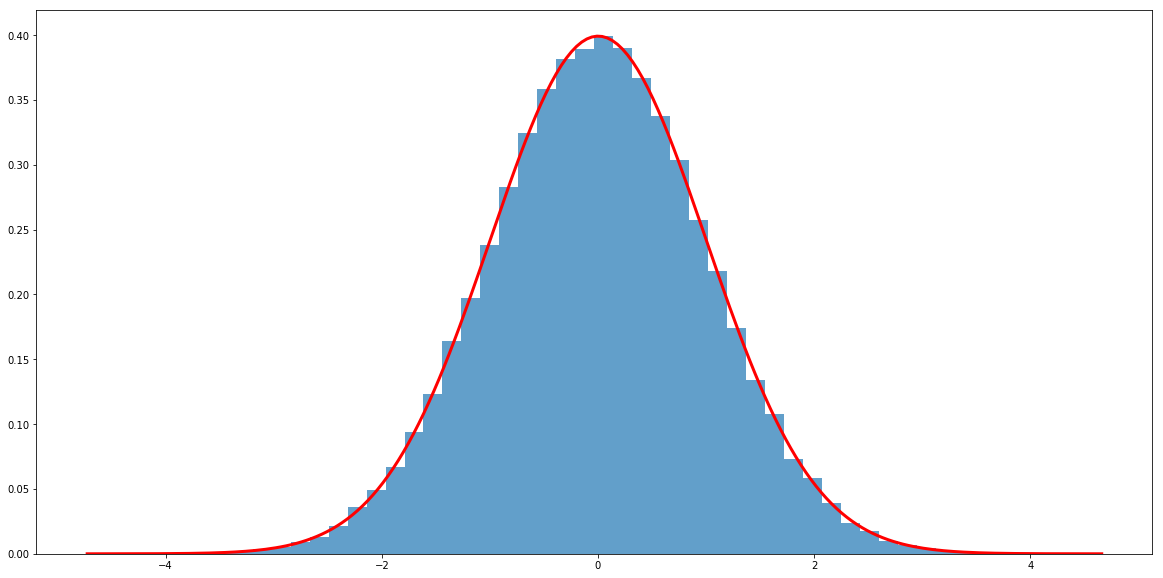

In [218]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(z1,fit=norm,kde=False,fit_kws={"color": "r", "lw": 3, "label": "normal"},hist_kws={"alpha": 0.7})
plt.show()

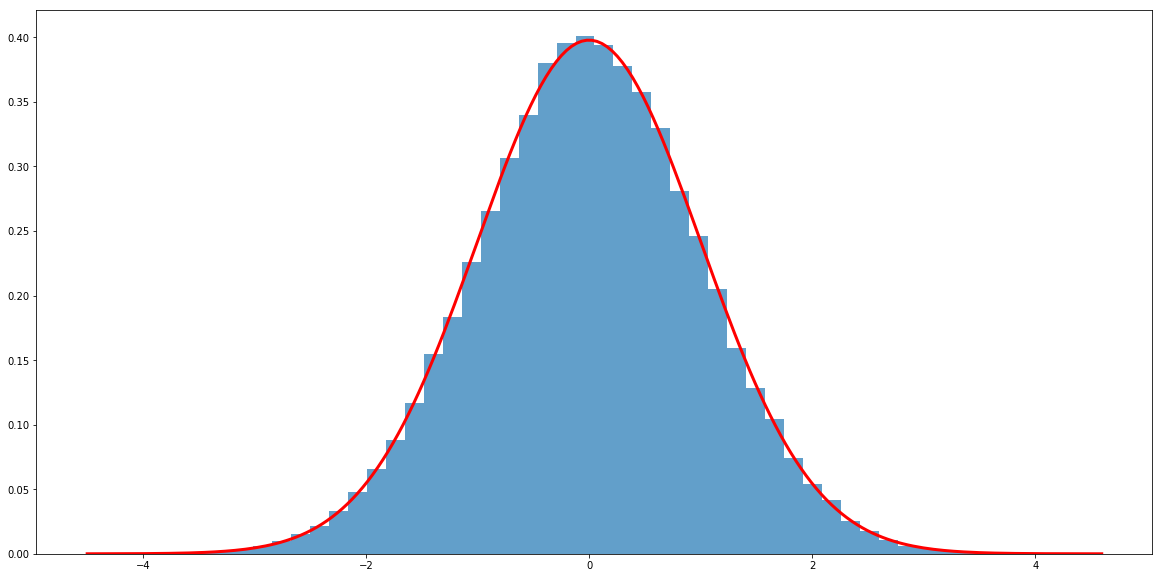

In [219]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(z2,fit=norm,kde=False,fit_kws={"color": "r", "lw": 3, "label": "normal"},hist_kws={"alpha": 0.7})
plt.show()

## Ejercicio 6

In [220]:
values=gcl(98771,size=100000,normalized=True)

In [221]:
categoria=[0,0,0,0]

for number in values:
    if number<0.1:
        categoria[0]+=1.0
    elif number>=0.1 and number<0.6:
        categoria[1]+=1.0
    elif number>=0.6 and number<0.9:
        categoria[2]+=1.0
    elif number>=0.9:
        categoria[3]+=1.0

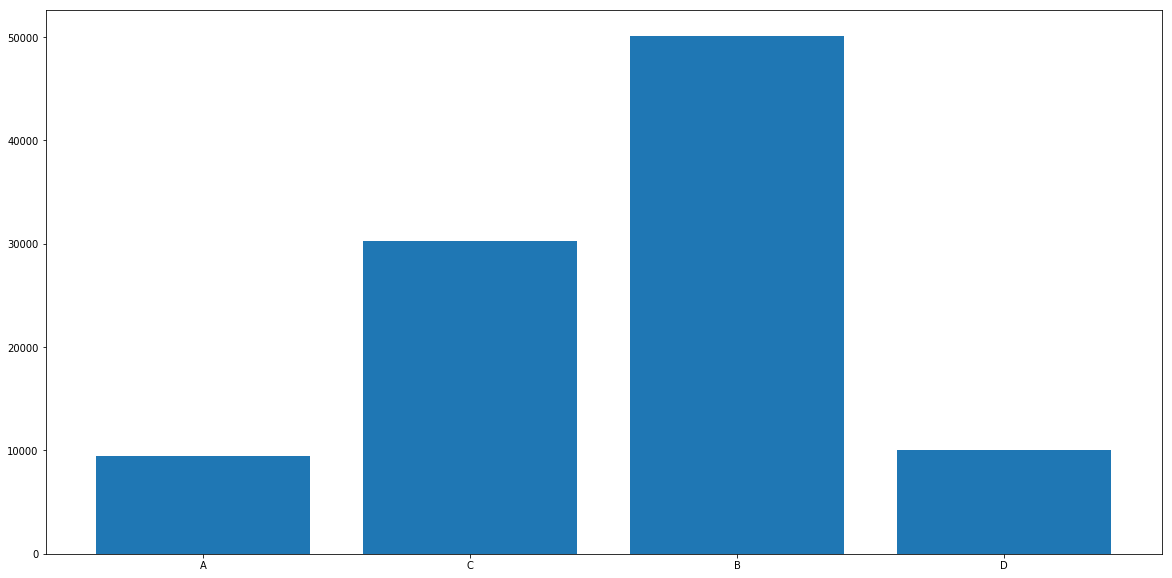

In [222]:
import matplotlib.pyplot as plt

data = {'A': categoria[0], 'B': categoria[1], 'C': categoria[2], 'D': categoria[3]}
names = list(data.keys())
values = list(data.values())


fig, ax = plt.subplots(figsize=(20,10))

plt.plot(figsize=(20, 10))
plt.bar(names, values)
plt.show()

## Ejercicio 7

In [223]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [224]:
def spectral_test_2d(lcg):
    '''
    Given a linear congruent generator lcg,
    obtain a 2D scatter plot where: for each
    point (x, y),
      - x = lcg(i)
      - y = lgc(i+1)
    '''
    
    # generate samples
    samples = 1000
    x = [lcg(i)   for i in range(samples)]
    y = [lcg(i+1) for i in range(samples)]
    
    # plot results
    fig, ax = plt.subplots(figsize=(20,10))
    sns.scatterplot(x=x, y=y)
    plt.show()

In [225]:
from mpl_toolkits import mplot3d

def spectral_test_3d(lcg):
    '''
    Given a linear congruent generator lcg,
    obtain a 3D scatter plot where: for each
    point (x, y, z),
      - x = lcg(i)
      - y = lgc(i+1)
      - z = lcg(i+2)
    '''
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection='3d')

    # generate samples
    samples = 1000
    x = [lcg(i)   for i in range(samples)]
    y = [lcg(i+1) for i in range(samples)]
    z = [lcg(i+2) for i in range(samples)]
    
    # plot results
    ax.scatter(x, y, z)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    # rotate axis and save an image every 60 degrees
    step = 60
    for angle in range(0, 360, step):
        ax.view_init(30, angle)
        plt.savefig('spectral_test_3d_{}.png'.format(str(angle)))

In [226]:
lcg = None
spectral_test_2d(lcg)
spectral_test_3d(lcg)

TypeError: 'NoneType' object is not callable

## Ejercicio 8

In [227]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [228]:
alpha = 0.3
beta = 0.6

# significance level
ns = 0.01

In [229]:
def gap_test(lcg, alpha, beta, ns):
    '''
    Basic walkthrough of the test
    1. Generate random numbers in [0,1] with the given lcg
    2. Obtain frecuencies of every observed gap
    3. Compare the observed distribution with a Geometric distribution
    '''
    
    samples = 1000
    
    # dictionary with observed gaps
    gaps = {}
    for i in range(samples):
        gap_size = 0
        
        # generate a number
        #u = lcg(np.random.uniform())
        u = np.random.uniform()
        
        # compute size of gap
        while u < alpha or beta < u:
            gap_size += 1
            u = np.random.uniform()

        # add gap size to dictionary
        if gap_size not in gaps:
            gaps[gap_size] = 0
        gaps[gap_size] += 1
    
    # fill not seen gaps with 0
    gs = [i for i in range(max(gaps))]
    for i in gs:
        if i not in gaps: 
            gaps[i] = 0
    
    # observed distribution
    observed = [gaps[g] for g in gs]
    
    # expected geometric distribution
    p_ab = beta - alpha
    expected = [int(samples * p_ab * (1 - p_ab)**(g)) for g in gs]
    
    # show histograms
    x1 = [i for i in range(len(observed)) for j in range(observed[i])]
    x2 = [i for i in range(len(expected)) for j in range(expected[i])]
    plt.hist(x1, bins=10, alpha=0.5, label='observed')
    plt.hist(x2, bins=10, alpha=0.5, label='expected')
    plt.show()
    
    # compare distributions
    chisq, p = scipy.stats.chisquare(observed, f_exp=expected)
    
    if p < ns: return False
    return True

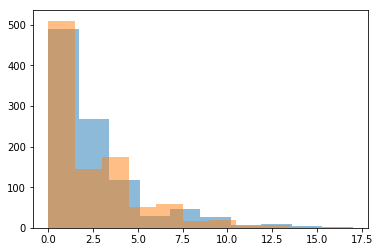

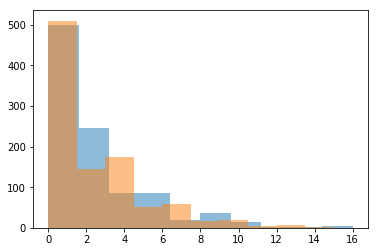

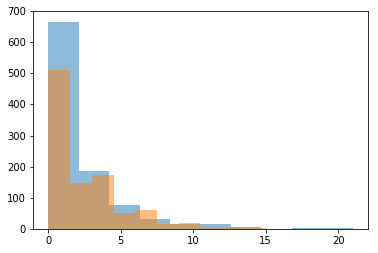

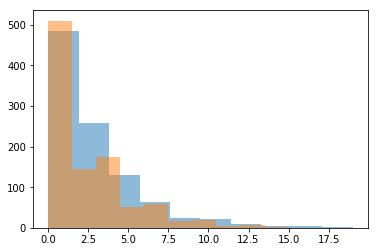

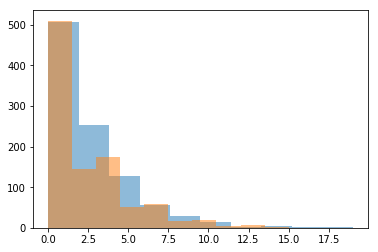

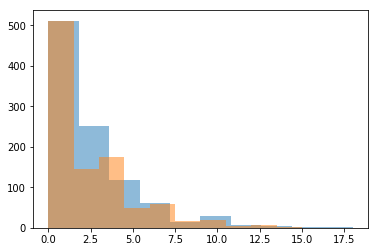

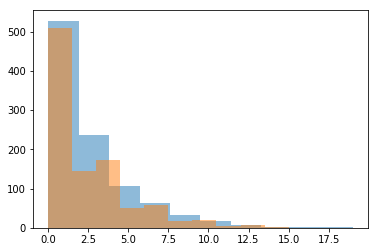

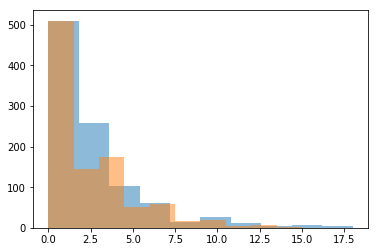

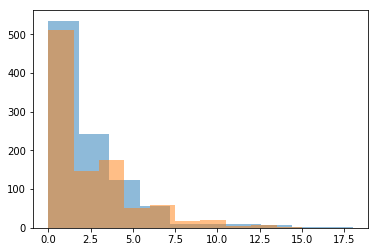

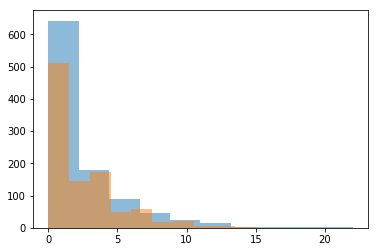

'El 0% de los experimentos pasan el test con ns=0.01'

In [230]:
# perform n experiments
n = 10
results = np.array([gap_test(lcg, alpha, beta, ns) for i in range(n)])

'El {}% de los experimentos pasan el test con ns={}'.format(sum(results)/len(results)*100, ns)

## Ejercicio 9

In [231]:
categoria

[9512.0, 50100.0, 30309.0, 10079.0]

In [232]:
from scipy import stats as stats
import matplotlib.mlab as mlab

frecs = categoria
expected_values =  [0.1*100000,0.5*100000,0.3*100000,0.1*100000]


(s,p) = stats.chisquare(frecs,f_exp = expected_values)

print("s = " + str(s))
print("p = " + str(p))

if(p < 0.01):
    
    print("Acepto H0")
else:
    
    print("Rechazo H0")
    (s,p) = stats.chisquare(frecs,f_exp = expected_values, ddof = degrees_of_freedom)
    
    if(p < 0.05):
        print("Acepto H0")
    else:
        print("Rechazo H0")

s = 27.8212
p = 3.95981957939e-06
Acepto H0


## Ejercicio 10

In [348]:
def p(x):
    return st.norm.pdf( x, loc=15, scale=3 )

def q(x):
    return st.expon.pdf( x, scale=50 )

In [349]:
def accept_reject_method(iter = 100000):
    samples = []

    for i in range(iter):
        z = np.random.exponential(50)
        u = np.random.uniform(0, k*q(z))

        if u < p(z):
            samples.append(z)

    return np.array(samples)

In [350]:
normal_values=list(accept_reject_method(100000))

In [351]:
print(len(normal_values))

11202


In [369]:
def empirical_cdf(values, x):
    values.sort()
    n = len(values)
    
    for i in range(n):
        if( i == 0 and x < values[i+1] ):
            return 0.0
        elif( i >= n and x >= values[i] ):
            return 1.0
        elif( x >= values[i] and x < values[i+1] ):
            return float(float(i)/float(n))
        
N = len(normal_values)
normal_values.sort()

empirical_normal_values = [ float(empirical_cdf(normal_values, normal_values[i])) for i in range(N-1) ]
theoretical_normal_values = [ float(norm.cdf(normal_values[i])) for i in range(N-1) ]

d_plus = [ float(empirical_normal_values[i] - theoretical_normal_values[i])  for i in range(N-1) ]
d_minus = [ float(theoretical_normal_values[i] - empirical_normal_values[i])  for i in range(N-1) ]

d = max(d_plus) if max(d_plus) > max(d_minus) else max(d_minus)
d

0.9999676627978975

In [372]:
theoretical_normal_values

[0.9999676627978975,
 0.9999889317705786,
 0.9999927768027435,
 0.9999987518030695,
 0.9999992802252478,
 0.9999995605631558,
 0.9999997985891981,
 0.9999998414639089,
 0.9999999015252801,
 0.9999999253050413,
 0.9999999828027243,
 0.9999999845284524,
 0.9999999916268434,
 0.9999999984088825,
 0.9999999991399313,
 0.9999999992211407,
 0.9999999996227567,
 0.9999999996517143,
 0.9999999998694166,
 0.9999999999095851,
 0.9999999999194394,
 0.9999999999506126,
 0.9999999999946876,
 0.9999999999948489,
 0.9999999999948704,
 0.9999999999953587,
 0.9999999999968471,
 0.999999999997551,
 0.999999999998447,
 0.999999999998517,
 0.9999999999988736,
 0.9999999999990913,
 0.9999999999991164,
 0.9999999999992779,
 0.99999999999929,
 0.9999999999993427,
 0.999999999999384,
 0.9999999999994138,
 0.9999999999995257,
 0.9999999999995706,
 0.9999999999995757,
 0.9999999999996358,
 0.9999999999996689,
 0.9999999999997098,
 0.9999999999997187,
 0.9999999999997209,
 0.9999999999998055,
 0.9999999999998088

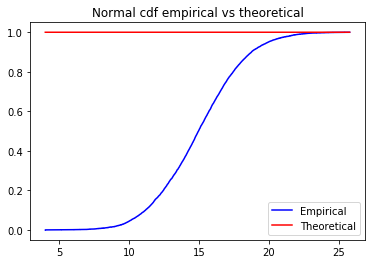

In [371]:
fig, ax = plt.subplots()

ax.step(normal_values[:-1], empirical_normal_values, 'b', label='Empirical') 
ax.plot(normal_values[:-1], theoretical_normal_values, 'r', label='Theoretical') 

ax.set_title("Normal cdf empirical vs theoretical")
leg = ax.legend();

plt.show()